In [2]:
import tensorflow as tf
physicaldevice = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(physicaldevice[0],True)

Num GPUs Available:  1


In [205]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read Data from CSV files

In [249]:
datas = pd.read_csv("C:\\Users\\abdul\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")
datas.set_index("Id",inplace=True)

# EDA

In [250]:
from jcopml.plot import plot_missing_value

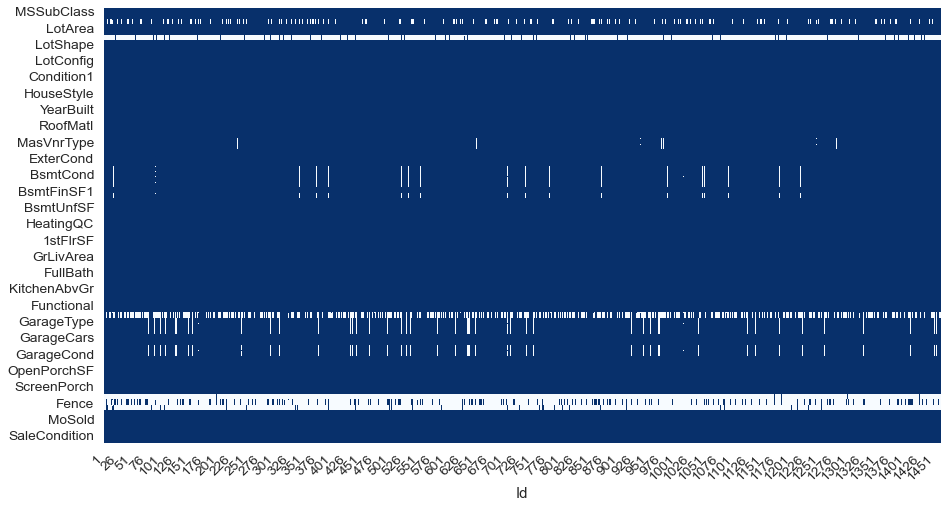

In [251]:
# clean null value
# if null >= 0.4 remove columns
plot_missing_value(datas)

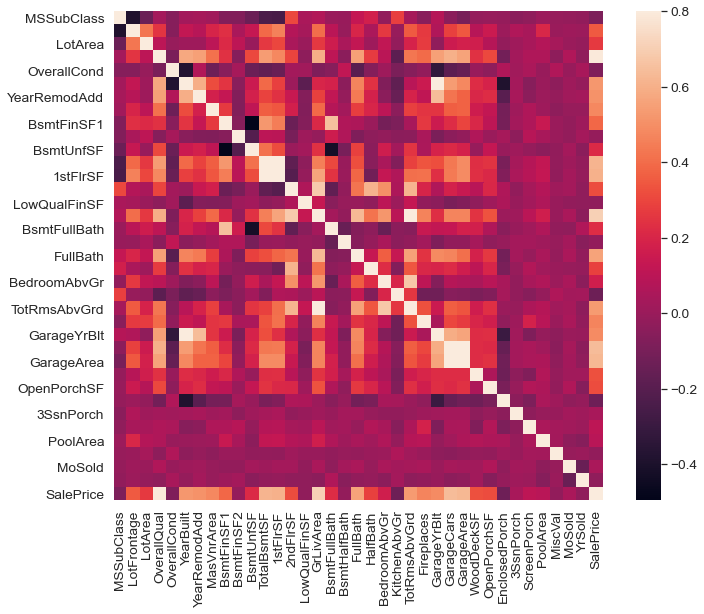

In [252]:
#correlation matrix
corrmat = datas.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

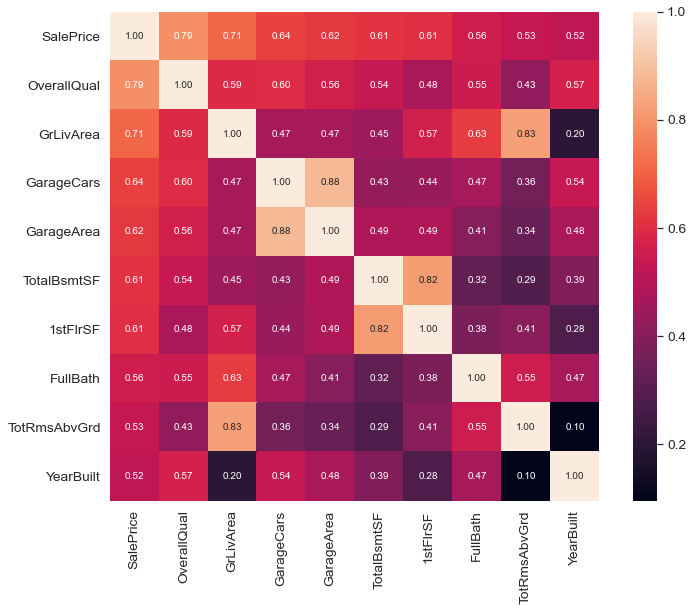

In [253]:
#choose the best variable for train
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(datas[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [254]:
dataset=datas[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']]

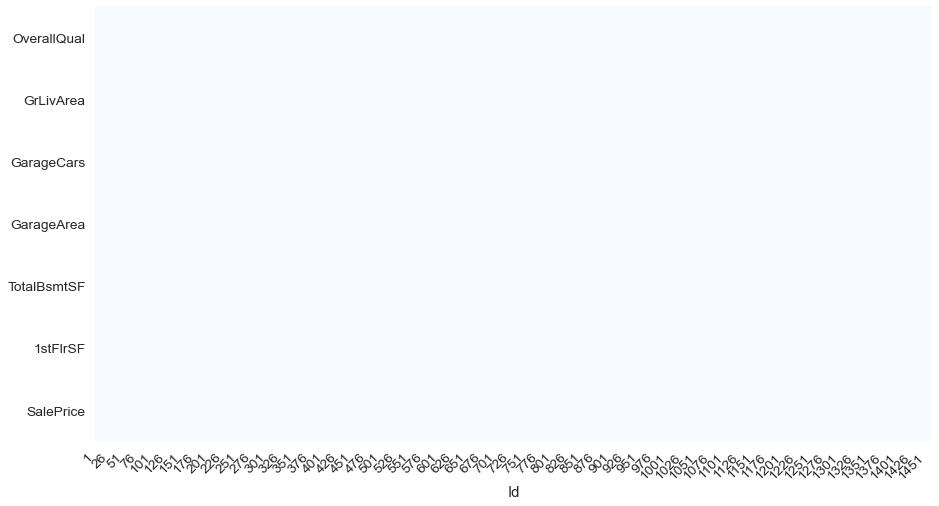

In [255]:
# Looking for null value
plot_missing_value(dataset)

In [256]:
# if the unique count <= 10 it wil be one hot encoding
for col in dataset.columns:
    if len(dataset[col].unique()) <= 10 :
        dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col)],axis=1)

In [259]:
for col in dataset.columns:
    if len(dataset[col].unique()) > 10 :
        print(col)


GrLivArea
GarageArea
TotalBsmtSF
1stFlrSF
SalePrice


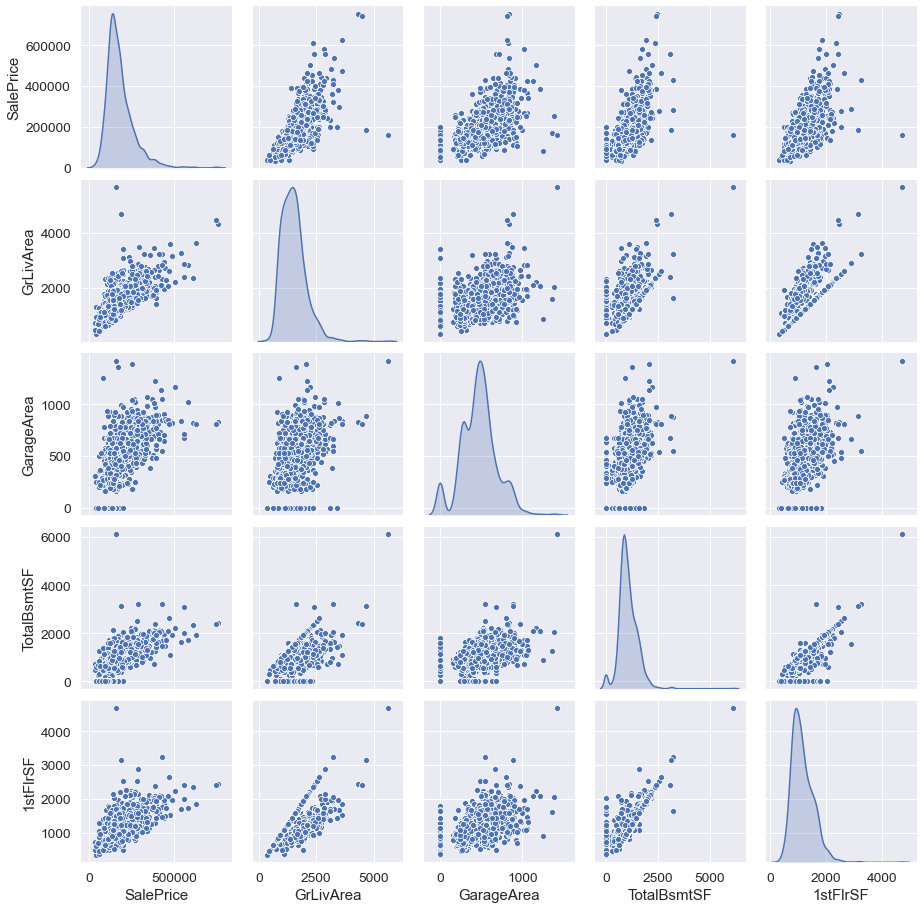

In [270]:
sns.pairplot(dataset[["SalePrice", "GrLivArea", "GarageArea", "TotalBsmtSF","1stFlrSF"]], diag_kind="kde")